# Importing Libraries and Dataset

In [1]:
! pip install bubbly
! pip install iplot
! pip install chart_studio
!pip install kneed

ERROR: Could not find a version that satisfies the requirement iplot (from versions: none)
ERROR: No matching distribution found for iplot


In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go
from chart_studio.plotly import plot, iplot
from plotly.offline import iplot
from kneed import KneeLocator
from yellowbrick.cluster import KElbowVisualizer
from bubbly.bubbly import bubbleplot
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_ = pd.read_csv('/content/happiness_report.csv')
df = df_.copy()
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [4]:
df.isnull().sum().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Overall rank,156.0,78.500000,45.177428,1.000,39.75000,78.5000,117.25000,156.000
Score,156.0,5.407096,1.113120,2.853,4.54450,5.3795,6.18450,7.769
GDP per capita,156.0,0.905147,0.398389,0.000,0.60275,0.9600,1.23250,1.684
Social support,156.0,1.208814,0.299191,0.000,1.05575,1.2715,1.45250,1.624
Healthy life expectancy,156.0,0.725244,0.242124,0.000,0.54775,0.7890,0.88175,1.141
Freedom to make life choices,156.0,0.392571,0.143289,0.000,0.30800,0.4170,0.50725,0.631
Generosity,156.0,0.184846,0.095254,0.000,0.10875,0.1775,0.24825,0.566
Perceptions of corruption,156.0,0.110603,0.094538,0.000,0.04700,0.0855,0.14125,0.453


## Duplicated Data

In [7]:
def check_duplications(dataframe):
    if dataframe.duplicated().sum() > 0:
        if dataframe.duplicated().sum() == 1:
            print('There is 1 duplicated value in data')
        else:
            print('There are {} duplicated values in data'.format(dataframe.duplicated().sum()))
    else:
        print('There are no duplicated values in data')

check_duplications(df)

#df[df.duplicated()]
#df.drop_duplicates(keep='first',inplace=True)

There are no duplicated values in data


In [8]:
df[df['Score'] == df['Score'].max()]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.34,1.587,0.986,0.596,0.153,0.393


## Pairplot

<Figure size 2000x2000 with 0 Axes>

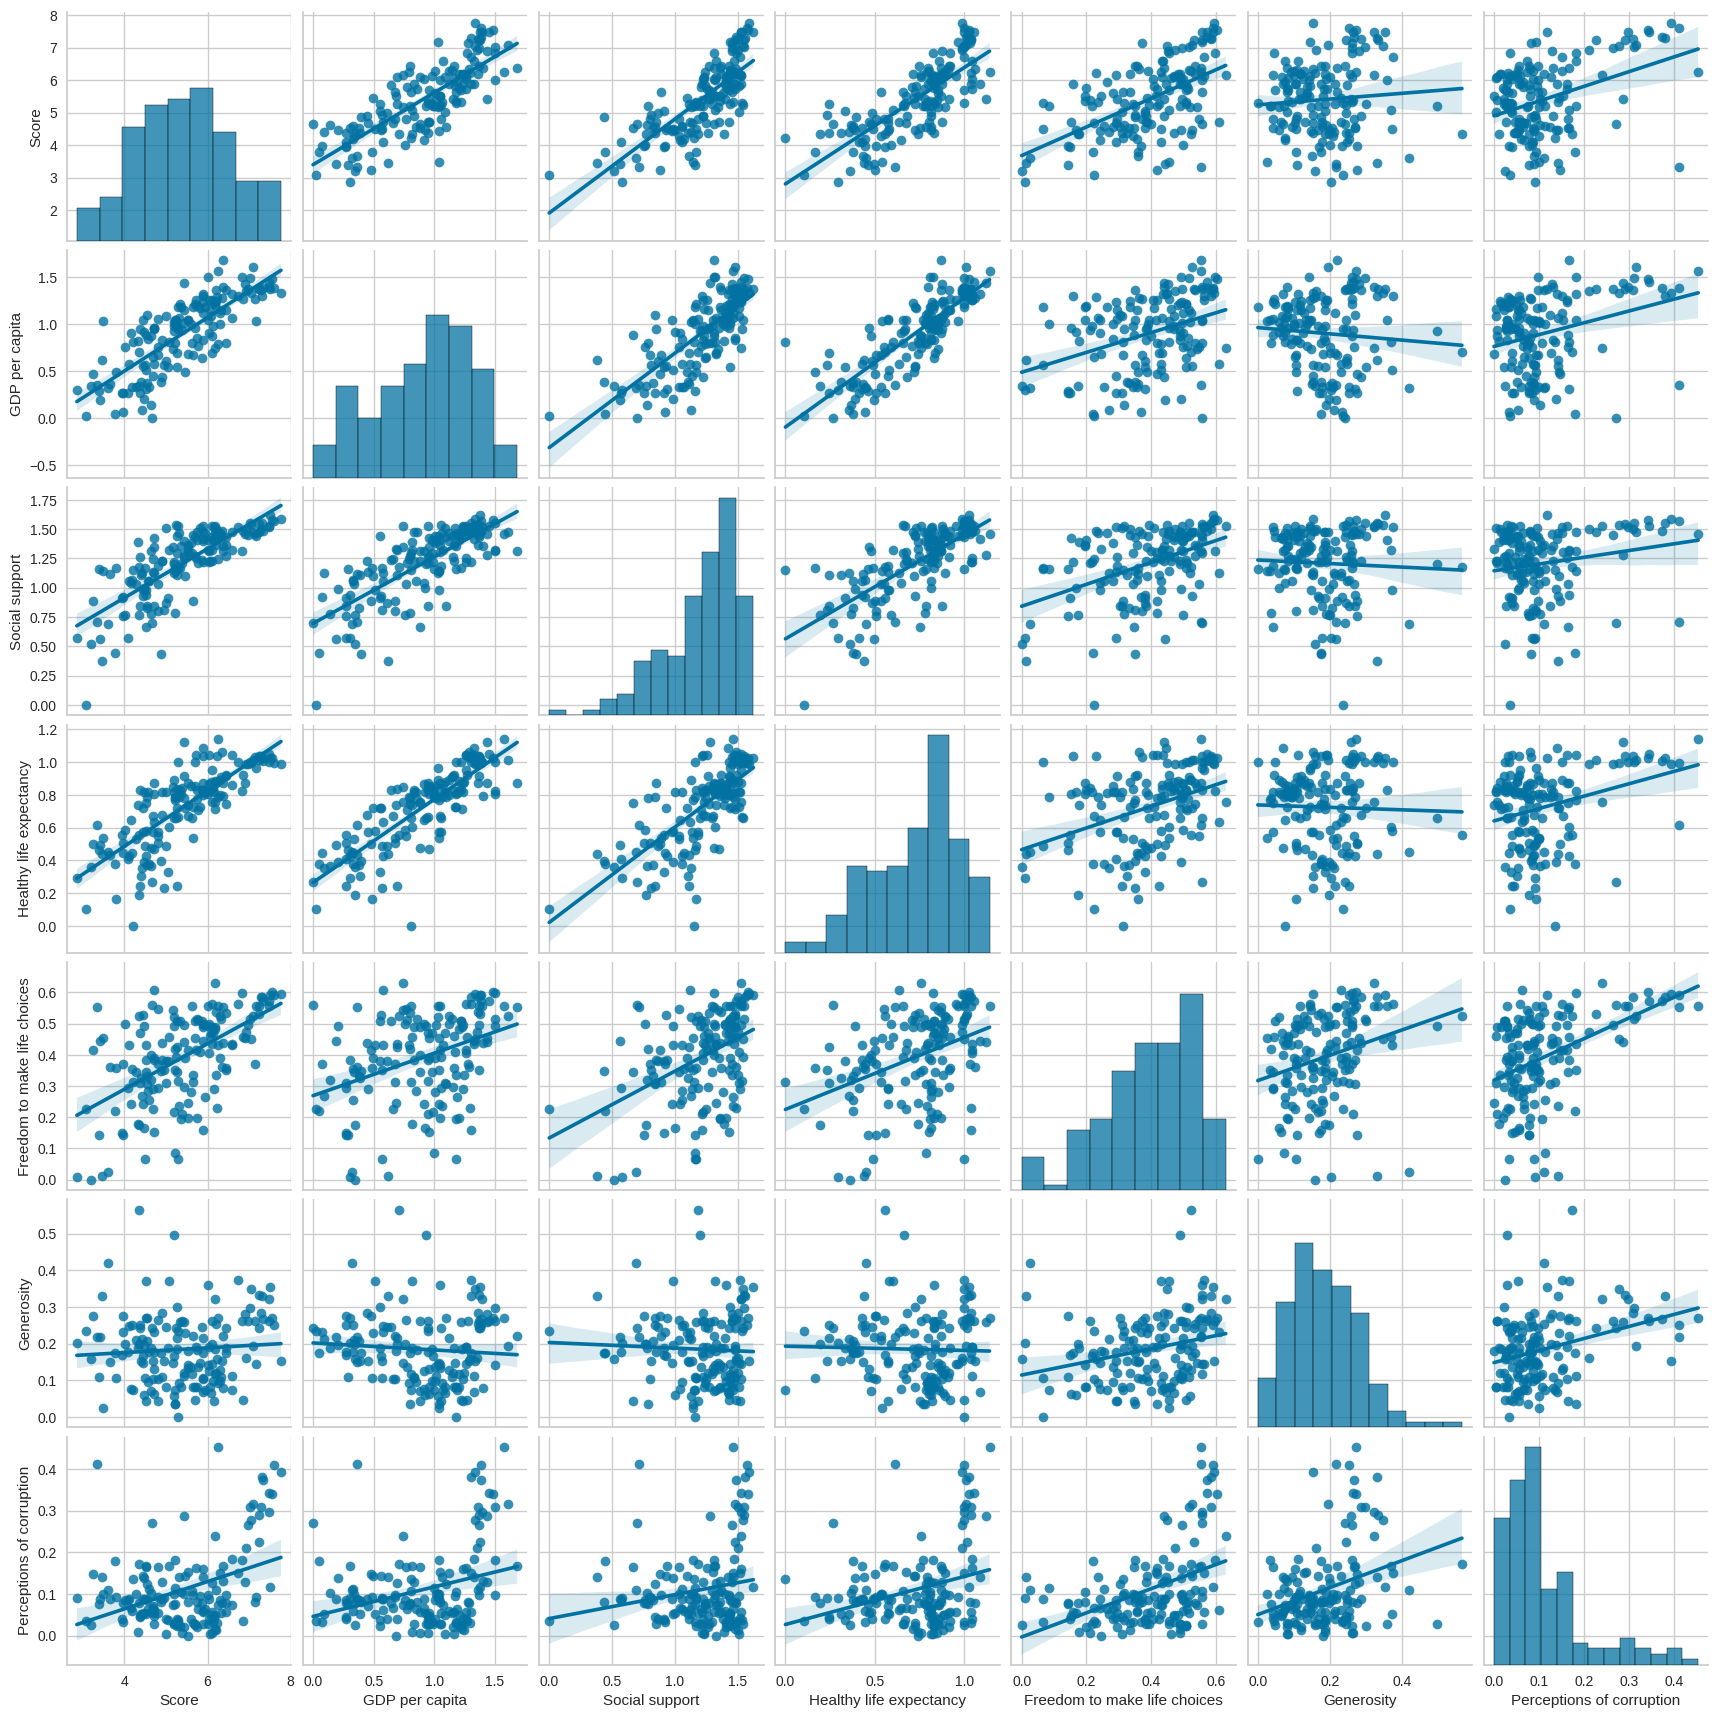

In [9]:
plt.figure(figsize=(20,20))
sns.pairplot(df[['Score', 'GDP per capita', 'Social support',
                     'Healthy life expectancy',
                      'Freedom to make life choices','Generosity',
                      'Perceptions of corruption']], kind='reg')

## Distplot

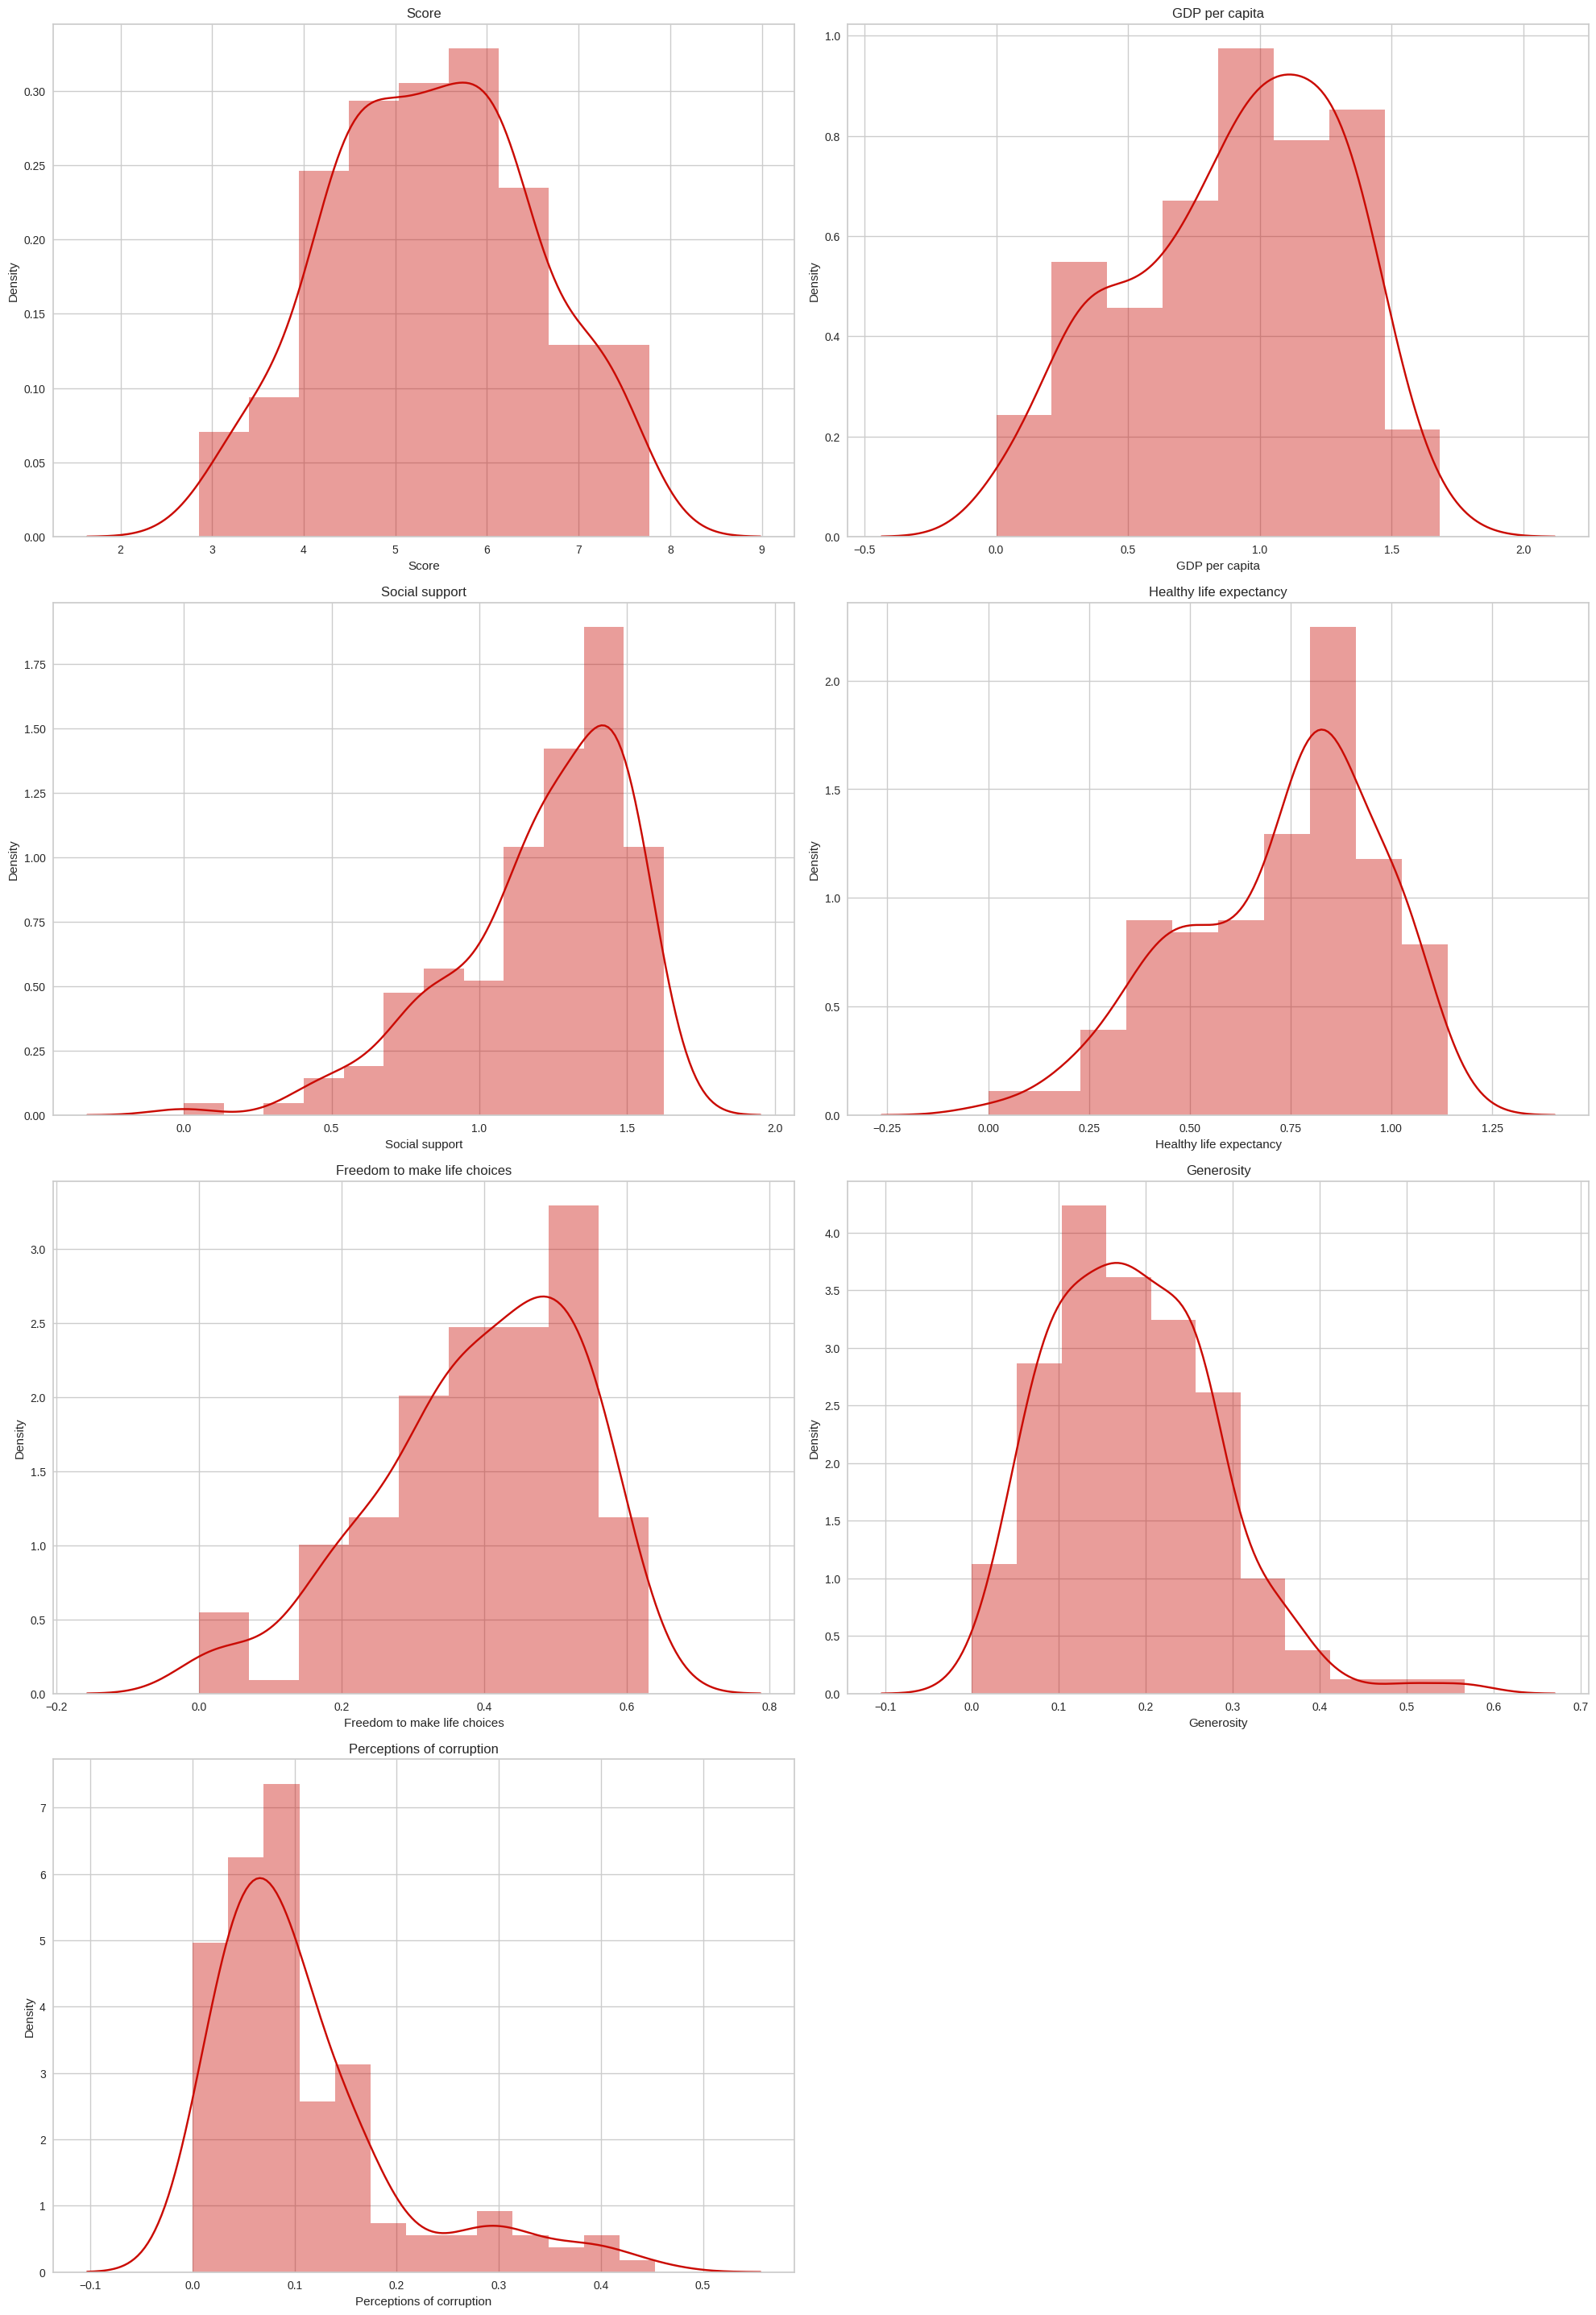

In [10]:
columns = ['Score','GDP per capita', 'Social support', 'Healthy life expectancy',
    'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']

plt.figure(figsize=(20,50))
for i in range(len(columns)):
    plt.subplot(7, 2, i+1)
    sns.distplot(df[columns[i]], color='r')
    plt.title(columns[i])

plt.tight_layout()

## Corelation Map

In [11]:
df_corr = df.drop('Country or region',axis=1)

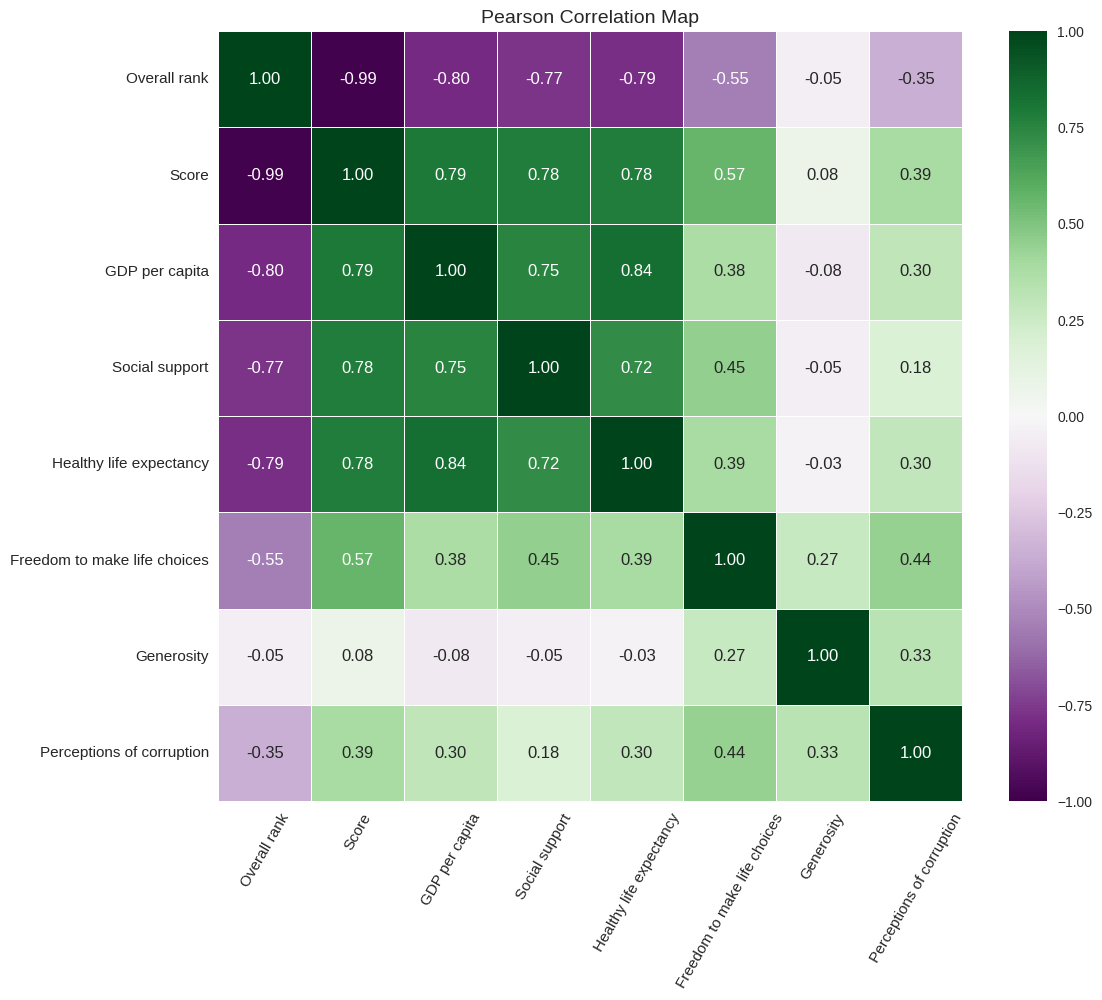

In [12]:
plt.figure(figsize=(12,10))
sns.heatmap(df_corr.corr(),annot= True,fmt = ".2f",
            vmin = -1, vmax = 1, cmap = "PRGn",
            linewidth = 0.4,linecolor = "white",annot_kws={"size": 12})
plt.xticks(rotation=60,size=11)
plt.yticks(rotation=0,size=11)
plt.title('Pearson Correlation Map', size = 14)
plt.show()

# Interactive Scatter Plot

* You can zoom in and zoom out

In [13]:
df.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [14]:
fig = px.scatter(df, x='GDP per capita', y= 'Score',
                 size='Overall rank',
                 text='Country or region',
                 color='Country or region',
                 trendline='ols')
fig.update_layout(title_text = 'Happiness Score vs GDP per Capita')
fig.show()

In [15]:
fig = px.scatter(df, x = 'Freedom to make life choices', y = "Score",
                 size = 'Overall rank',
                 color = "Country or region",
                 hover_name = "Country or region",
                 trendline='ols'
                )
fig.update_traces(textposition='top center')
fig.update_layout(title_text = 'Happiness Score vs Freedom to make life choices' )
fig.update_layout(height=400)
fig.show()

# Preparing Data for Model

In [16]:
X = df.drop(columns=['Overall rank', 'Country or region', 'Score'])
X.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1.340,1.587,0.986,0.596,0.153,0.393
1,1.383,1.573,0.996,0.592,0.252,0.410
2,1.488,1.582,1.028,0.603,0.271,0.341
3,1.380,1.624,1.026,0.591,0.354,0.118
4,1.396,1.522,0.999,0.557,0.322,0.298


## Scaling

In [17]:
scaler= StandardScaler()
X_scaled = scaler.fit_transform(X)
X_final  =pd.DataFrame(X_scaled, columns=X.columns)

# K-Means Clustering

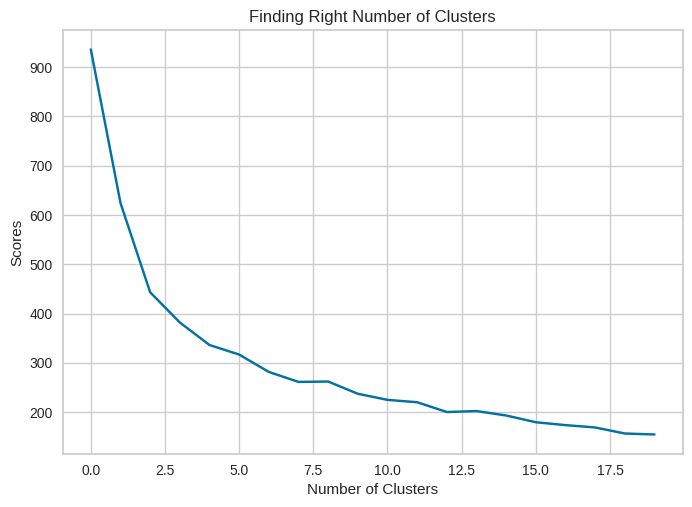

In [18]:
scores =[]
for i in range(1,21):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_final)
    scores.append(kmeans.inertia_ )

plt.plot(scores, 'bx-')
plt.title('Finding Right Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Scores')
plt.show()

In [19]:
kneedle = KneeLocator(range(1,21), scores, curve="convex", direction="decreasing")
print("Best k:", kneedle.elbow)

elbow_points = kneedle.all_elbows
print("Other k points:", elbow_points)

Best k: 5
Other k points: {5}


In [20]:
elbow_points = kneedle.all_elbows
if len(elbow_points) > 1:
    second_elbow = elbow_points[1] if len(elbow_points) > 1 else None
    third_elbow = elbow_points[2] if len(elbow_points) > 2 else None
    print("Second elbow:", second_elbow)
    print("Third elbow:", third_elbow)
else:
    print("Not enough elbow points detected.")


Not enough elbow points detected.


## Elbow by Distortion Score, Silhoutte Score and Calinski Score

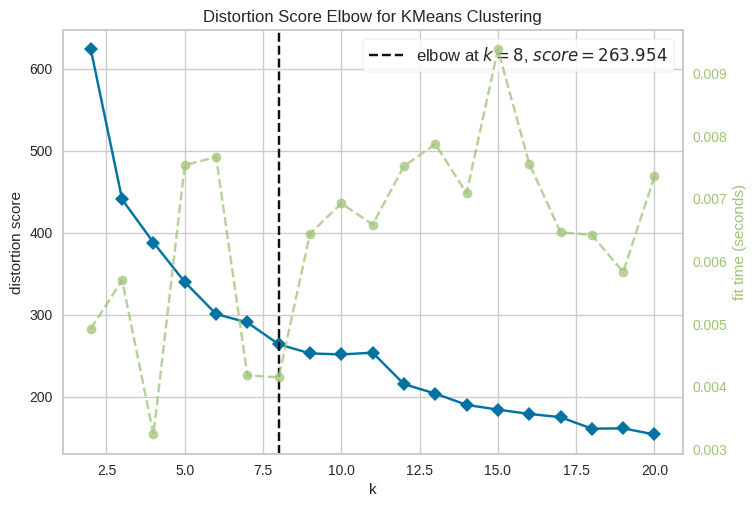

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2,21))
elbow.fit(X_final)
elbow.show()

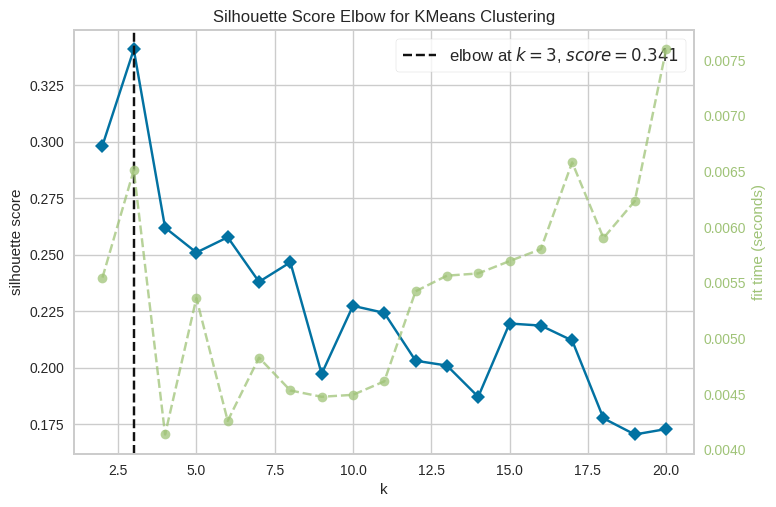

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [22]:
elbow = KElbowVisualizer(KMeans(), k=(2, 21), metric='silhouette')
elbow.fit(X_final)
elbow.show()

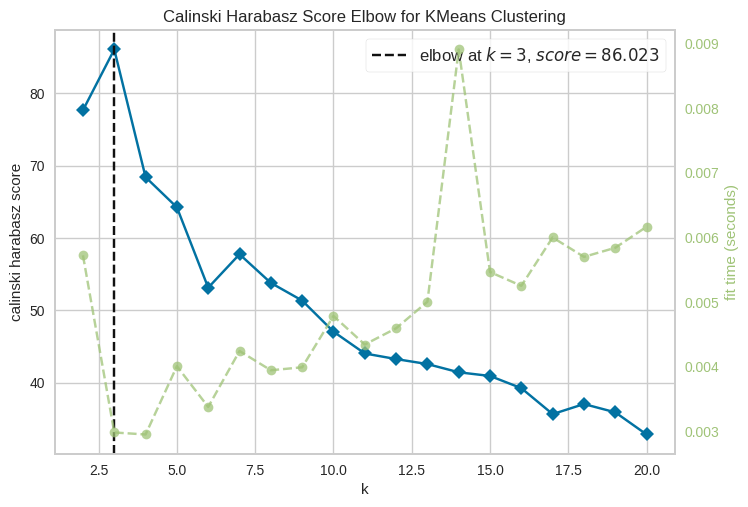

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [23]:
elbow = KElbowVisualizer(KMeans(), k=(2, 21), metric='calinski_harabasz')
elbow.fit(X_final)
elbow.show()

## Best Cluster Results

* Inertia Score: 5
* Distortion Score: 6
* Silhouette Score: 3
* Calinski Harabasz Score: 3

**We will contiune 3 clusters.**

In [24]:
kmeans = KMeans(3)
kmeans.fit(X_final)
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 2,
       1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [25]:
kmeans.cluster_centers_

array([[ 1.0440483 ,  0.84045675,  0.88671774,  1.04395863,  1.20151704,
         1.46865179],
       [ 0.33840122,  0.34041826,  0.38387917, -0.07257391, -0.54376011,
        -0.43828352],
       [-1.2737923 , -1.15083343, -1.25977929, -0.51571571,  0.2553247 ,
        -0.10543818]])

In [26]:
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=[X_final.columns])
cluster_centers

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1.044048,0.840457,0.886718,1.043959,1.201517,1.468652
1,0.338401,0.340418,0.383879,-0.072574,-0.543760,-0.438284
2,-1.273792,-1.150833,-1.259779,-0.515716,0.255325,-0.105438


In [27]:
cluster_centers  = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(cluster_centers, columns=[X_final.columns])
cluster_centers

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1.319750,1.459464,0.939250,0.541679,0.298929,0.249000
1,1.039530,1.310337,0.817892,0.382205,0.133217,0.069301
2,0.399311,0.865600,0.421200,0.318911,0.209089,0.100667


In [31]:
labels = kmeans.labels_

In [32]:
cluster_df = pd.concat([df, pd.DataFrame({'cluster':labels})],axis=1)
cluster_df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,cluster
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,0
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,0
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,0
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,0
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,0
...,...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,2
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,2
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,2
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,2


# Comparison of Clusters

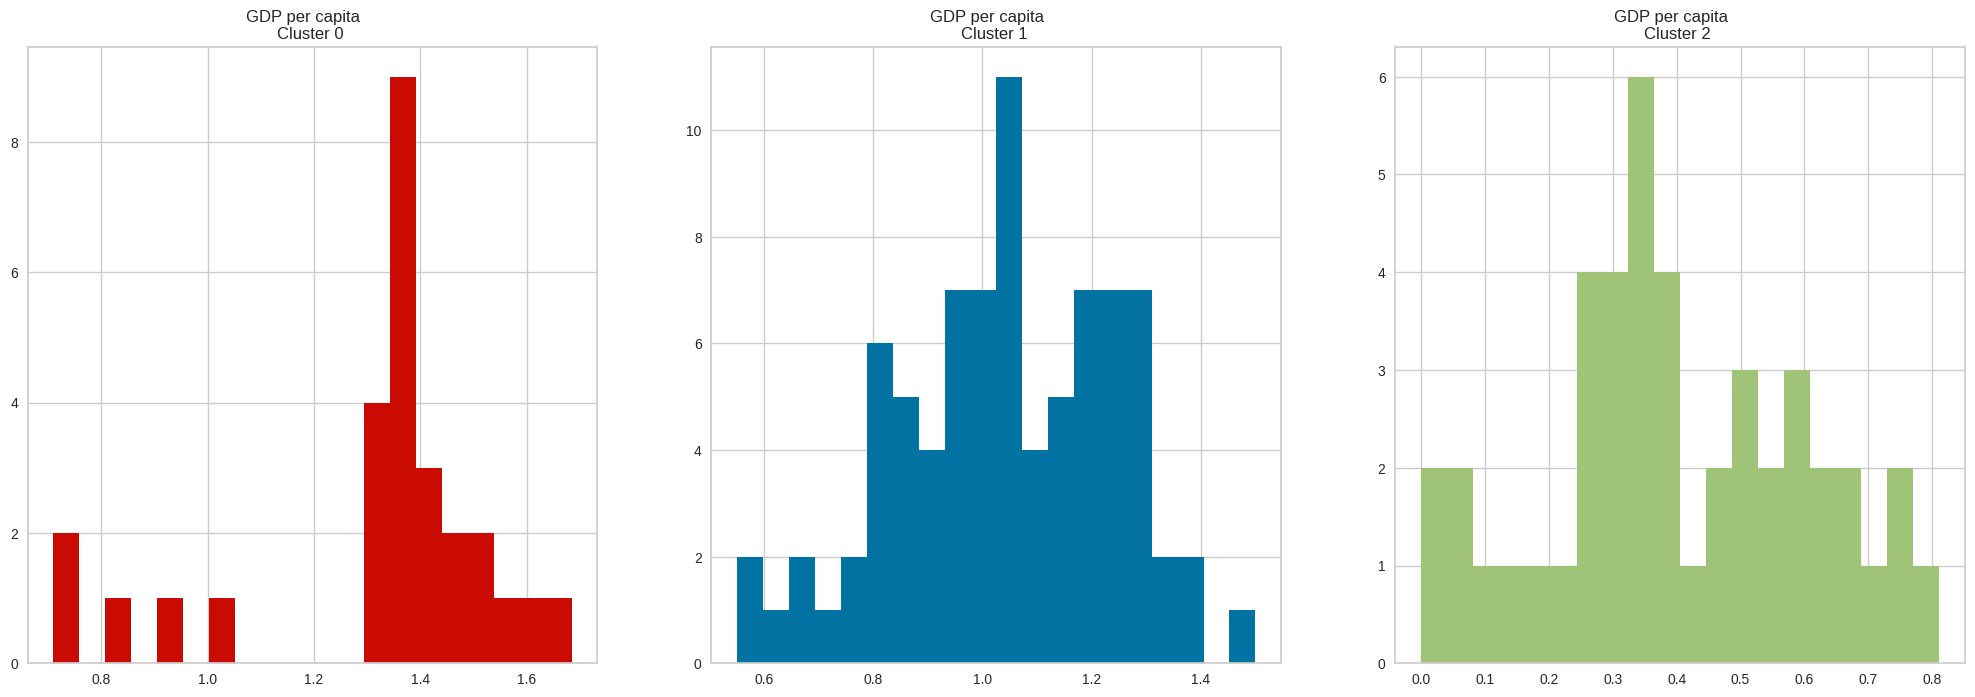

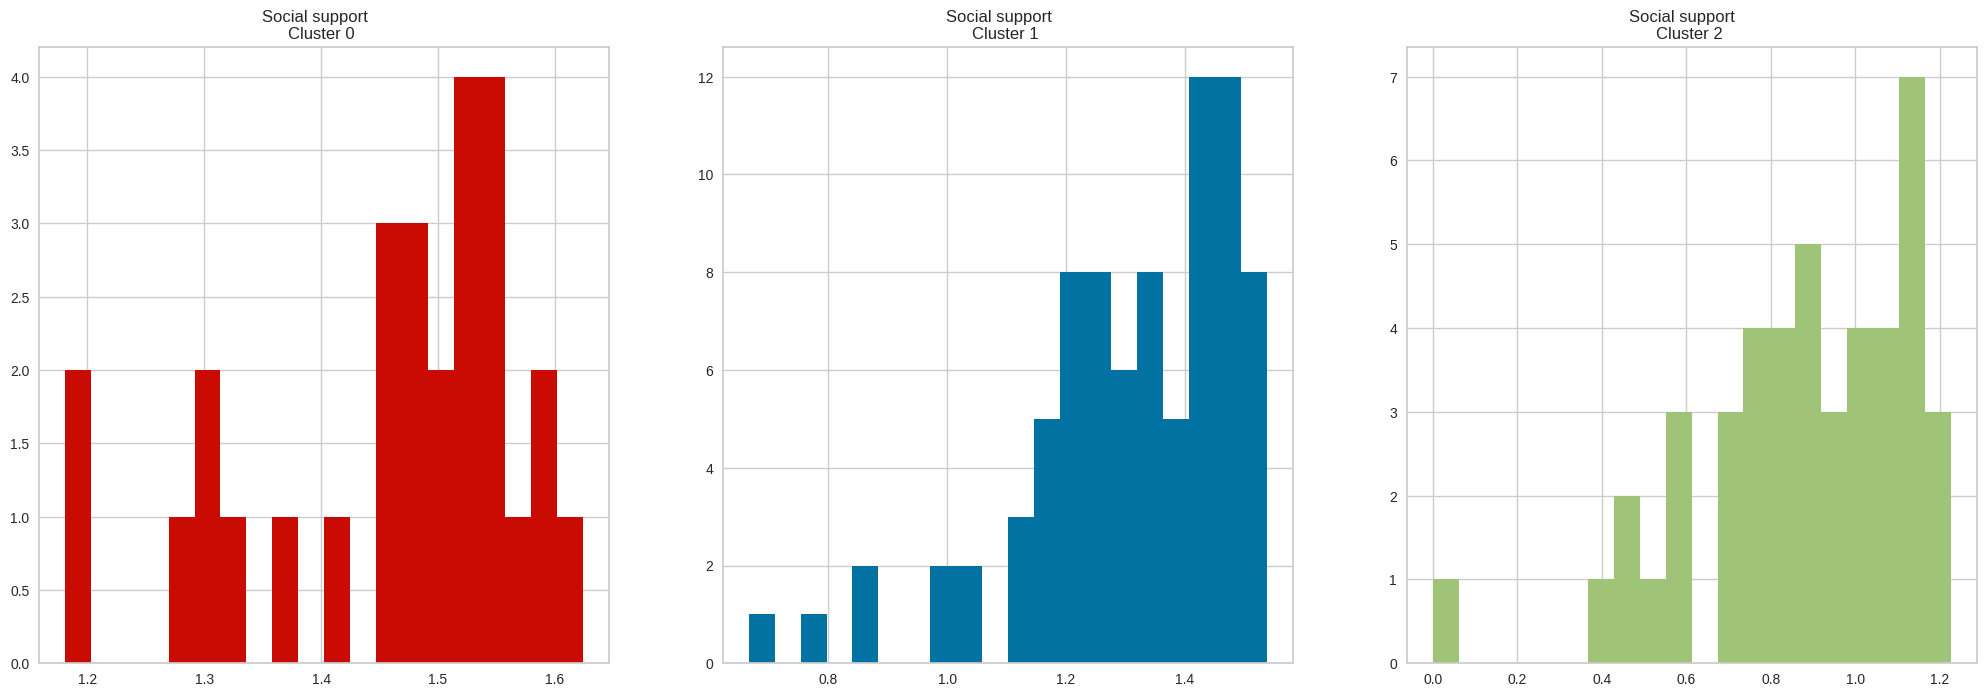

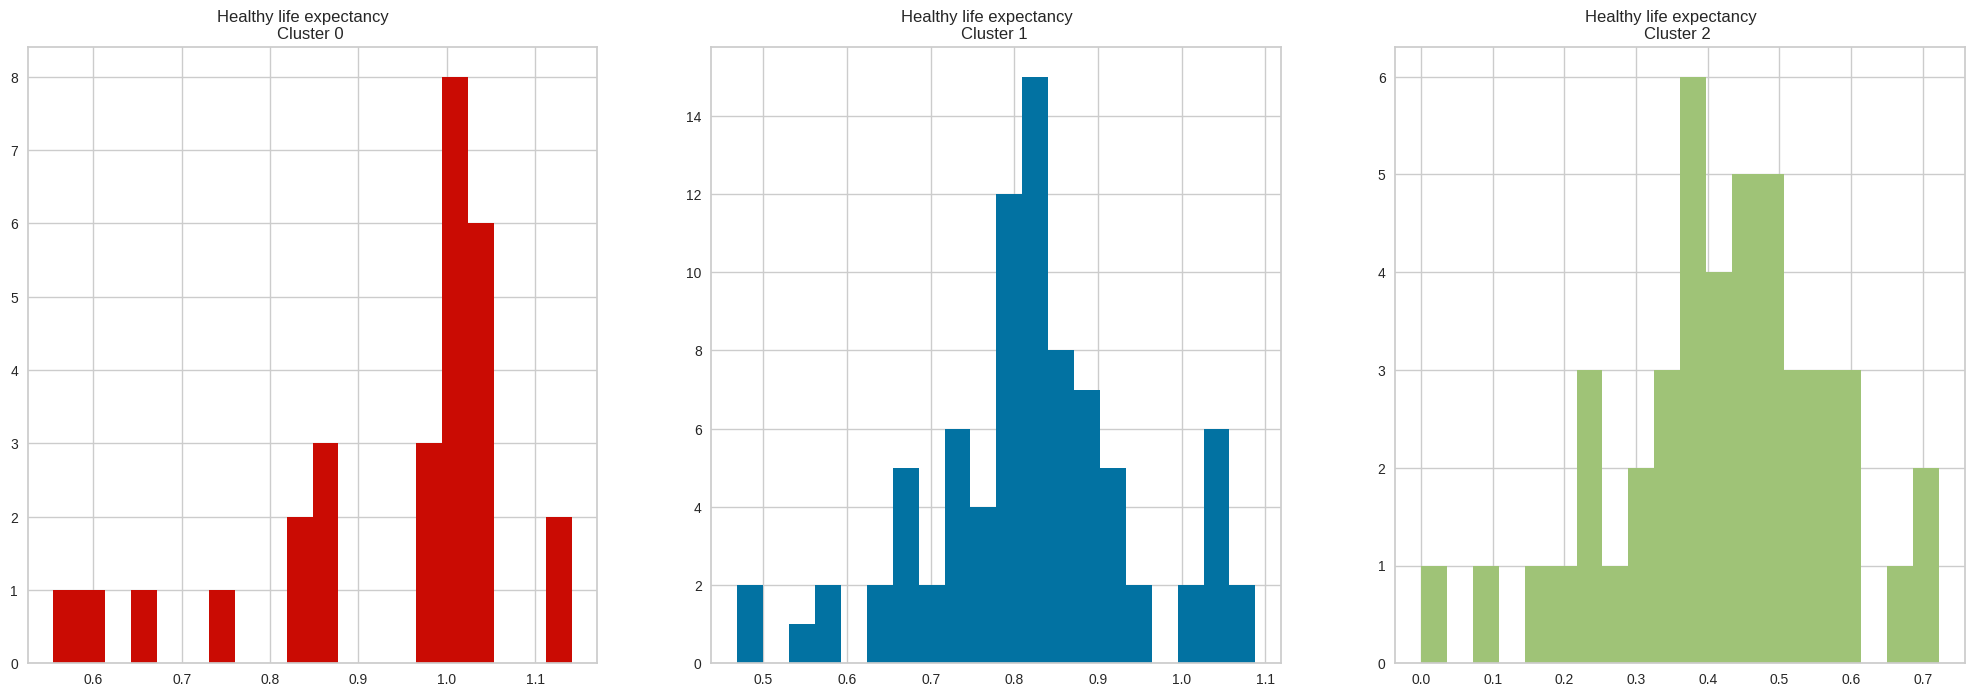

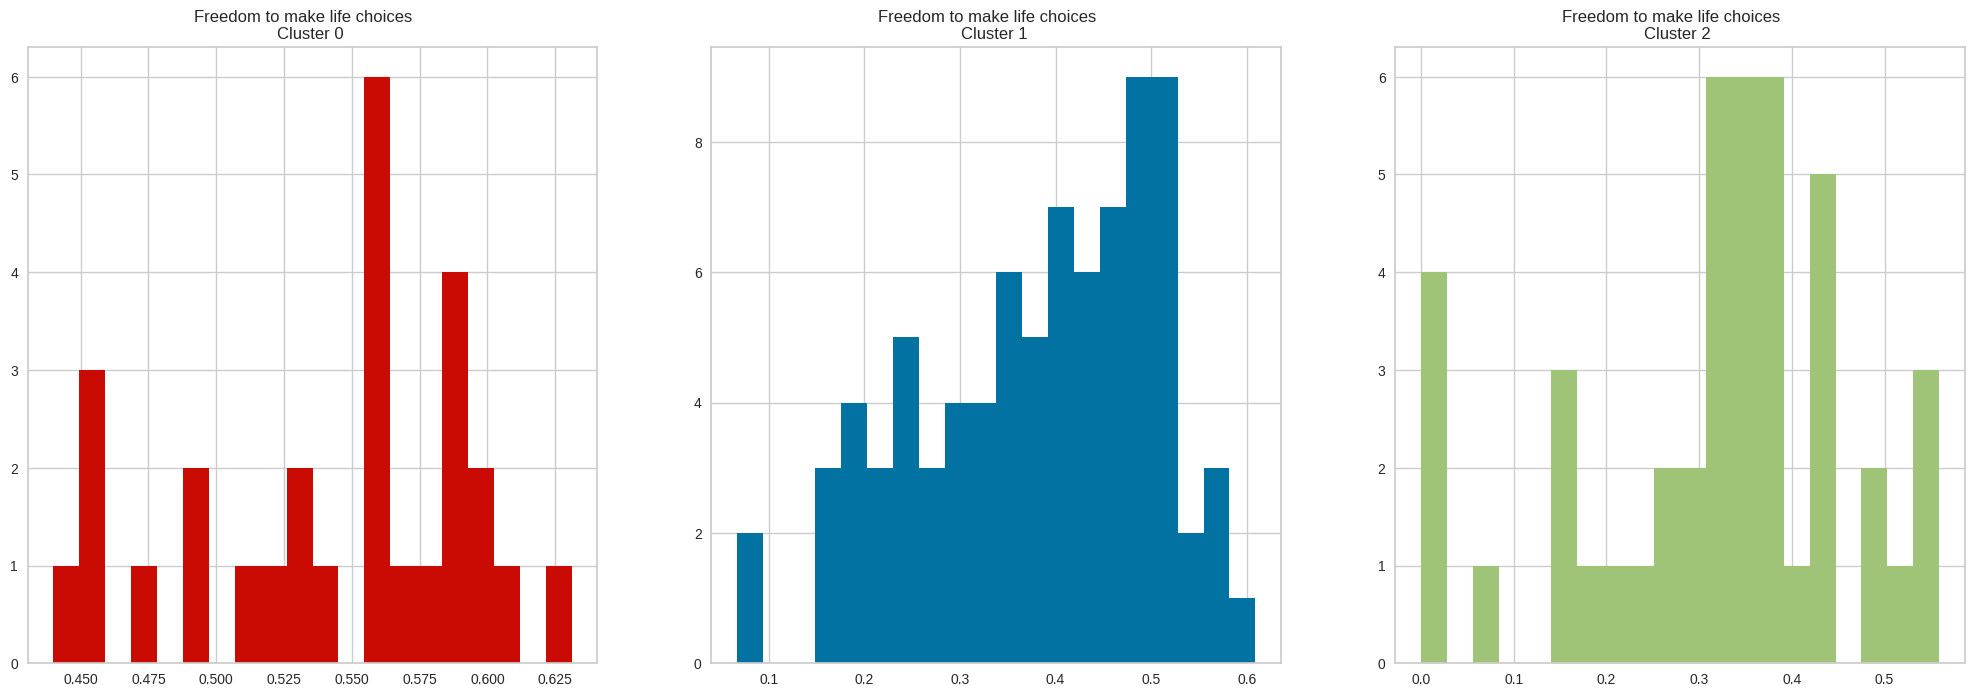

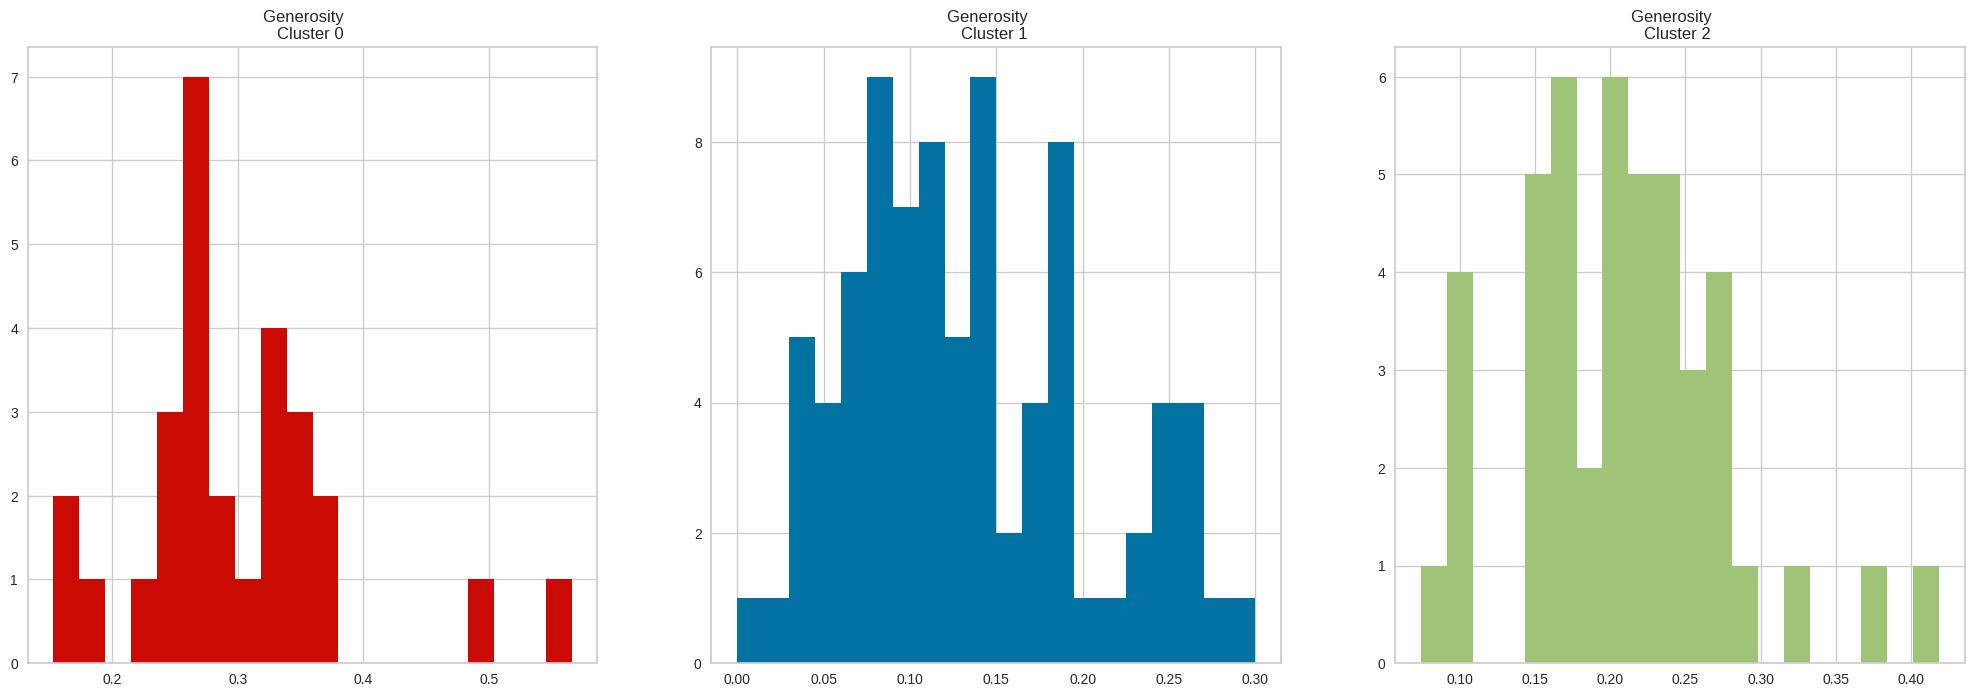

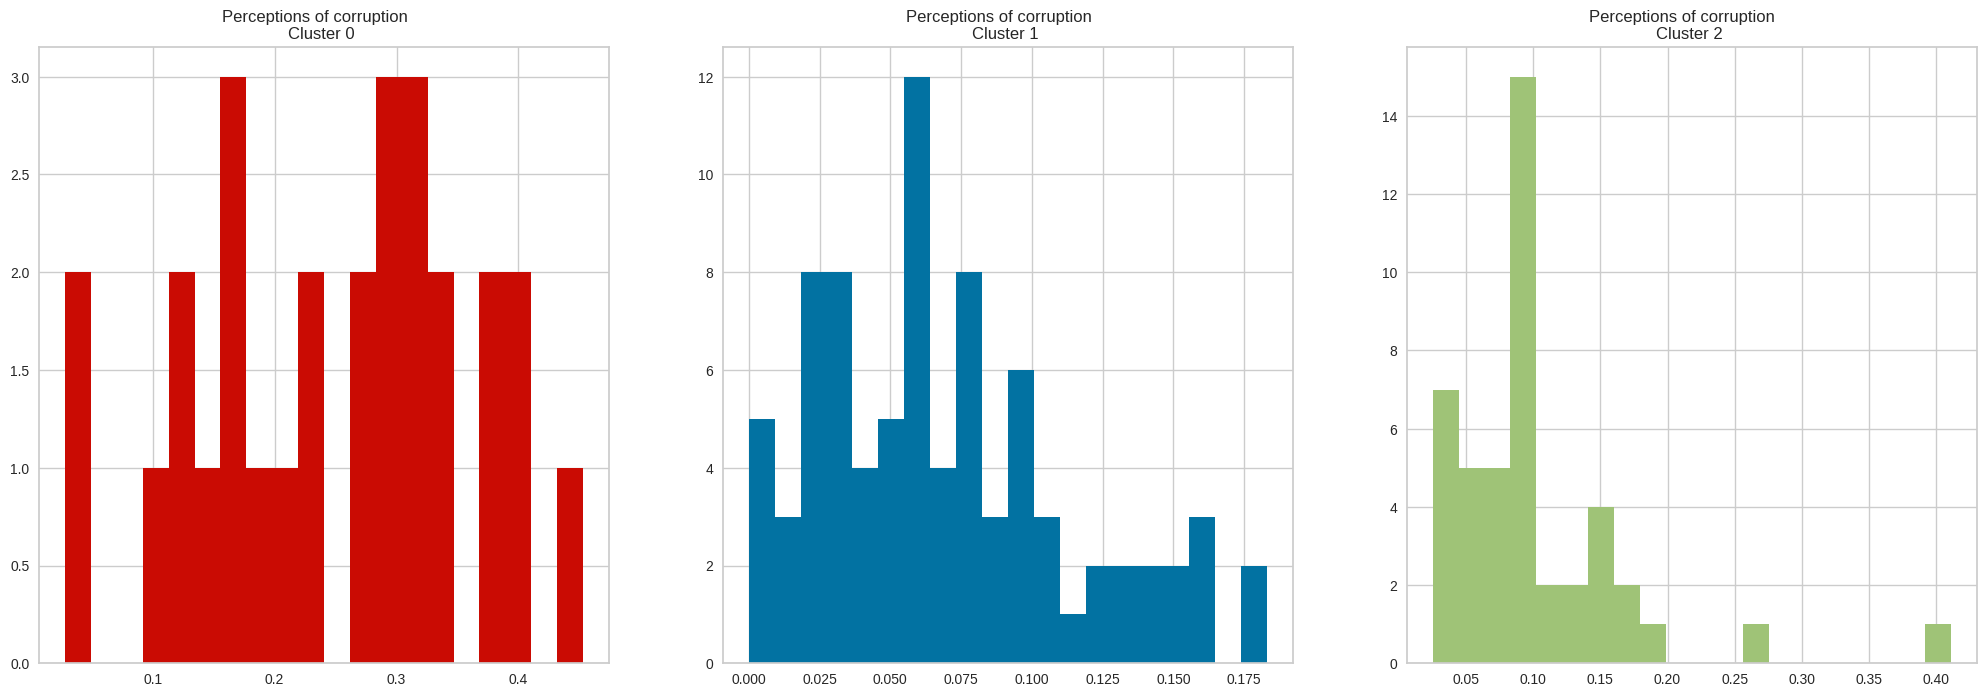

In [37]:
colors = ['r','b','g']
for i in X_final.columns:
  plt.figure(figsize = (25, 8))
  for j in range(3):
    plt.subplot(1,3,j+1)
    cluster = cluster_df[cluster_df['cluster'] == j]
    cluster[i].hist(bins = 20, color=colors[j])
    plt.title('{}    \nCluster {} '.format(i, j))

  plt.show()

In [38]:
fig = px.scatter(cluster_df, x = 'cluster', y = "Score",
           size = 'Overall rank', color = "Country or region", hover_name = "Country or region",
          trendline = "ols")

fig.update_layout(
    title_text = 'Happiness Score vs Cluster'
)
fig.show()

In [39]:
fig = px.scatter(cluster_df, x='cluster', y='GDP per capita',
           size='Overall rank', color="Country or region", hover_name="Country or region",
          trendline= "ols")

fig.update_layout(
    title_text='GDP vs Clusters'
)
fig.show()

In [49]:
figure = px.scatter(
    cluster_df,
    x='GDP per capita',
    y='Perceptions of corruption',
    size='Score',
    color='cluster',
    hover_name='Country or region',
    size_max=60,
    title='Clusters Based Impact of Economy, Corruption and Life Expectancy on Happiness Scores of Nations',
    labels={'cluster': 'Cluster'},
    color_continuous_scale='Portland')

figure.update_layout(
    xaxis_title="GDP per capita",
    yaxis_title="Corruption",
    height=650,
    legend_title="Cluster")
figure.show()

In [51]:
cluster_df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,cluster
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,0
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,0
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,0
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,0
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,0
...,...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,2
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,2
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,2
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,2


In [58]:
import plotly.graph_objects as go

figure = go.Figure(data=[go.Scatter3d(
    x=cluster_df['GDP per capita'],
    y=cluster_df['Perceptions of corruption'],
    z=cluster_df['Healthy life expectancy'],
    text=cluster_df['Country or region'],
    mode='markers',
    marker=dict(
        size=cluster_df['Score'] * 6,
        color=cluster_df['cluster'],
        colorscale='Portland',
        opacity=1))])

figure.update_layout(
    title='Clusters based Impact of Economy, Corruption and Life Expectancy on Happiness Scores of Nations',
    scene=dict(
        xaxis_title="GDP per capita",
        yaxis_title="Corruption",
        zaxis_title="Life Expectancy"),
    coloraxis_colorbar=dict(
        title="Cluster"),
    height=1000)

figure.show()
